In [46]:
import pandas as pd
f_detail = pd.read_csv('AdvWorksCusts.csv')
f_status = pd.read_csv('AW_BikeBuyer.csv')
data = pd.concat([f_detail, f_status['BikeBuyer']], axis=1)

In [47]:
f_detail.head()

CustomerID Title  FirstName MiddleName LastName Suffix  \
0       11000   NaN        Jon          V     Yang    NaN   
1       11001   NaN     Eugene          L    Huang    NaN   
2       11002   NaN      Ruben        NaN   Torres    NaN   
3       11003   NaN    Christy        NaN      Zhu    NaN   
4       11004   NaN  Elizabeth        NaN  Johnson    NaN   

          AddressLine1 AddressLine2         City StateProvinceName  \
0      3761 N. 14th St          NaN  Rockhampton        Queensland   
1           2243 W St.          NaN      Seaford          Victoria   
2     5844 Linden Land          NaN       Hobart          Tasmania   
3     1825 Village Pl.          NaN   North Ryde   New South Wales   
4  7553 Harness Circle          NaN   Wollongong   New South Wales   

       ...        BirthDate   Education    Occupation Gender MaritalStatus  \
0      ...       1966-04-08  Bachelors   Professional      M             M   
1      ...       1965-05-14  Bachelors   Professional      M             S   
2      ...       1965-08-12  Bachelors   Professional      M             M   
3      ...       1968-02-15  Bachelors   Professional      F             S   
4      ...       1968-08-08  Bachelors   Professional      F             S   

  HomeOwnerFlag NumberCarsOwned NumberChildrenAtHome  TotalChildren  \
0             1               0                    0              2   
1             0               1                    3              3   
2             1               1                    3              3   
3             0               1                    0              0   
4             1               4                    5              5   

   YearlyIncome  
0        137947  
1        101141  
2         91945  
3         86688  
4         92771  

[5 rows x 23 columns]

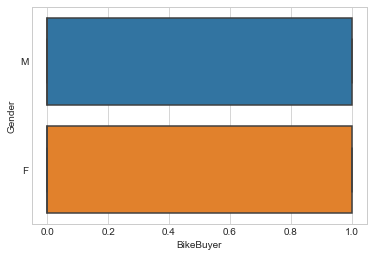

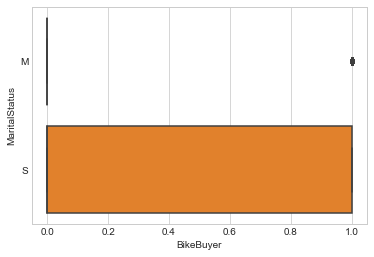

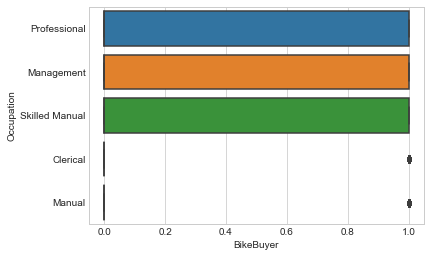

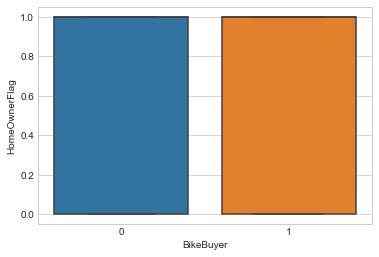

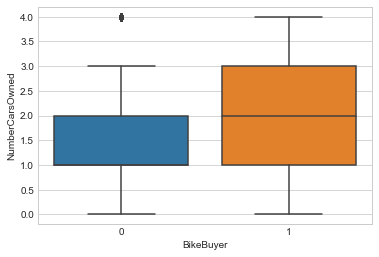

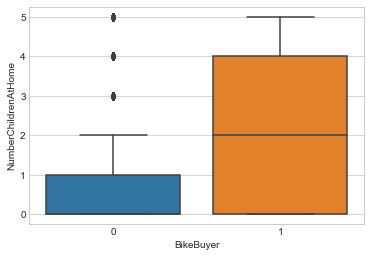

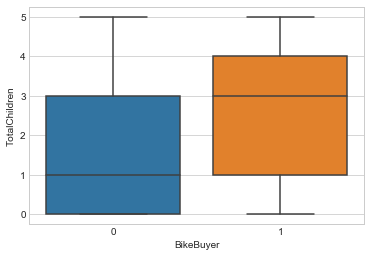

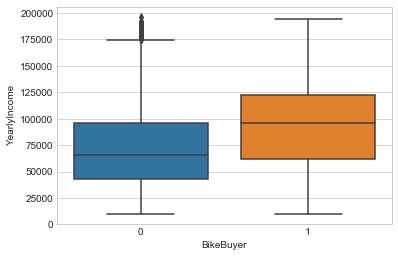

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
def plot_box(data, cols, col_x = 'BikeBuyer'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.boxplot(col_x, col, data=data)
        plt.xlabel(col_x) # Set text for the x axis
        plt.ylabel(col)# Set text for y axis
        plt.show()

num_cols = ['Gender','MaritalStatus','Occupation', 'HomeOwnerFlag',
 'NumberCarsOwned',
 'NumberChildrenAtHome',
 'TotalChildren',
 'YearlyIncome']
plot_box(data, num_cols)

In [48]:
data = pd.concat([data,pd.get_dummies(data['Occupation'], prefix='Occupation',
                                 dummy_na=True)],axis=1).drop(['Occupation'],axis=1)
data = pd.concat([data,pd.get_dummies(data['Gender'], prefix='Gender',
                                 dummy_na=True)],axis=1).drop(['Gender'],axis=1)
data = pd.concat([data,pd.get_dummies(data['MaritalStatus'], prefix='MaritalStatus',
                                 dummy_na=True)],axis=1).drop(['MaritalStatus'],axis=1)
data.head()

CustomerID Title  FirstName MiddleName LastName Suffix  \
0       11000   NaN        Jon          V     Yang    NaN   
1       11001   NaN     Eugene          L    Huang    NaN   
2       11002   NaN      Ruben        NaN   Torres    NaN   
3       11003   NaN    Christy        NaN      Zhu    NaN   
4       11004   NaN  Elizabeth        NaN  Johnson    NaN   

          AddressLine1 AddressLine2         City StateProvinceName  \
0      3761 N. 14th St          NaN  Rockhampton        Queensland   
1           2243 W St.          NaN      Seaford          Victoria   
2     5844 Linden Land          NaN       Hobart          Tasmania   
3     1825 Village Pl.          NaN   North Ryde   New South Wales   
4  7553 Harness Circle          NaN   Wollongong   New South Wales   

         ...         Occupation_Manual Occupation_Professional  \
0        ...                         0                       1   
1        ...                         0                       1   
2        ...                         0                       1   
3        ...                         0                       1   
4        ...                         0                       1   

  Occupation_Skilled Manual Occupation_nan Gender_F  Gender_M  Gender_nan  \
0                         0              0        0         1           0   
1                         0              0        0         1           0   
2                         0              0        0         1           0   
3                         0              0        1         0           0   
4                         0              0        1         0           0   

   MaritalStatus_M  MaritalStatus_S  MaritalStatus_nan  
0                1                0                  0  
1                0                1                  0  
2                1                0                  0  
3                0                1                  0  
4                0                1                  0  

[5 rows x 33 columns]

In [49]:
list(data)

['CustomerID',
 'Title',
 'FirstName',
 'MiddleName',
 'LastName',
 'Suffix',
 'AddressLine1',
 'AddressLine2',
 'City',
 'StateProvinceName',
 'CountryRegionName',
 'PostalCode',
 'PhoneNumber',
 'BirthDate',
 'Education',
 'HomeOwnerFlag',
 'NumberCarsOwned',
 'NumberChildrenAtHome',
 'TotalChildren',
 'YearlyIncome',
 'BikeBuyer',
 'Occupation_Clerical',
 'Occupation_Management',
 'Occupation_Manual',
 'Occupation_Professional',
 'Occupation_Skilled Manual',
 'Occupation_nan',
 'Gender_F',
 'Gender_M',
 'Gender_nan',
 'MaritalStatus_M',
 'MaritalStatus_S',
 'MaritalStatus_nan']

In [50]:
X=data[['Occupation_Clerical','Occupation_Management',
       'Occupation_Manual','Occupation_Professional',
       'Occupation_Skilled Manual','Occupation_nan',
       'Gender_F','Gender_M',
       'Gender_nan','MaritalStatus_M',
       'MaritalStatus_S','MaritalStatus_nan','NumberCarsOwned','NumberChildrenAtHome','YearlyIncome']]
y=data['BikeBuyer']

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train.shape

(11067, 15)

In [52]:
X_train.head()

Occupation_Clerical  Occupation_Management  Occupation_Manual  \
10009                    0                      0                  0   
7408                     1                      0                  0   
11358                    0                      0                  0   
11909                    0                      0                  0   
6596                     0                      1                  0   

       Occupation_Professional  Occupation_Skilled Manual  Occupation_nan  \
10009                        1                          0               0   
7408                         0                          0               0   
11358                        1                          0               0   
11909                        0                          1               0   
6596                         0                          0               0   

       Gender_F  Gender_M  Gender_nan  MaritalStatus_M  MaritalStatus_S  \
10009         0         1           0                1                0   
7408          0         1           0                1                0   
11358         1         0           0                1                0   
11909         0         1           0                1                0   
6596          0         1           0                1                0   

       MaritalStatus_nan  NumberCarsOwned  NumberChildrenAtHome  YearlyIncome  
10009                  0                2                     0         98736  
7408                   0                0                     0         24470  
11358                  0                0                     1         84214  
11909                  0                2                     2         95687  
6596                   0                1                     4        146121

In [53]:
y_train[y_train==0].shape

(7433,)

In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np
rfc=RandomForestClassifier(random_state=42)

In [55]:
param_grid = { 
    'n_estimators': [100,200,300,400,500,600],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [2,3,4,5,6,7,8,9,10],
    'criterion' :['gini', 'entropy']
}


In [ ]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

In [ ]:
CV_rfc.best_params_

In [56]:
rfc1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 300, max_depth=7, criterion='gini')
rfc1.fit(X_train, y_train)
pred=rfc1.predict(X_test)
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,pred))

Accuracy for Random Forest on CV data:  0.7855832721936904
